The mean of all values: 9.261252084167237
9.96075093957698 6.2850287564429825 5.484710376186567 9.265673925040732


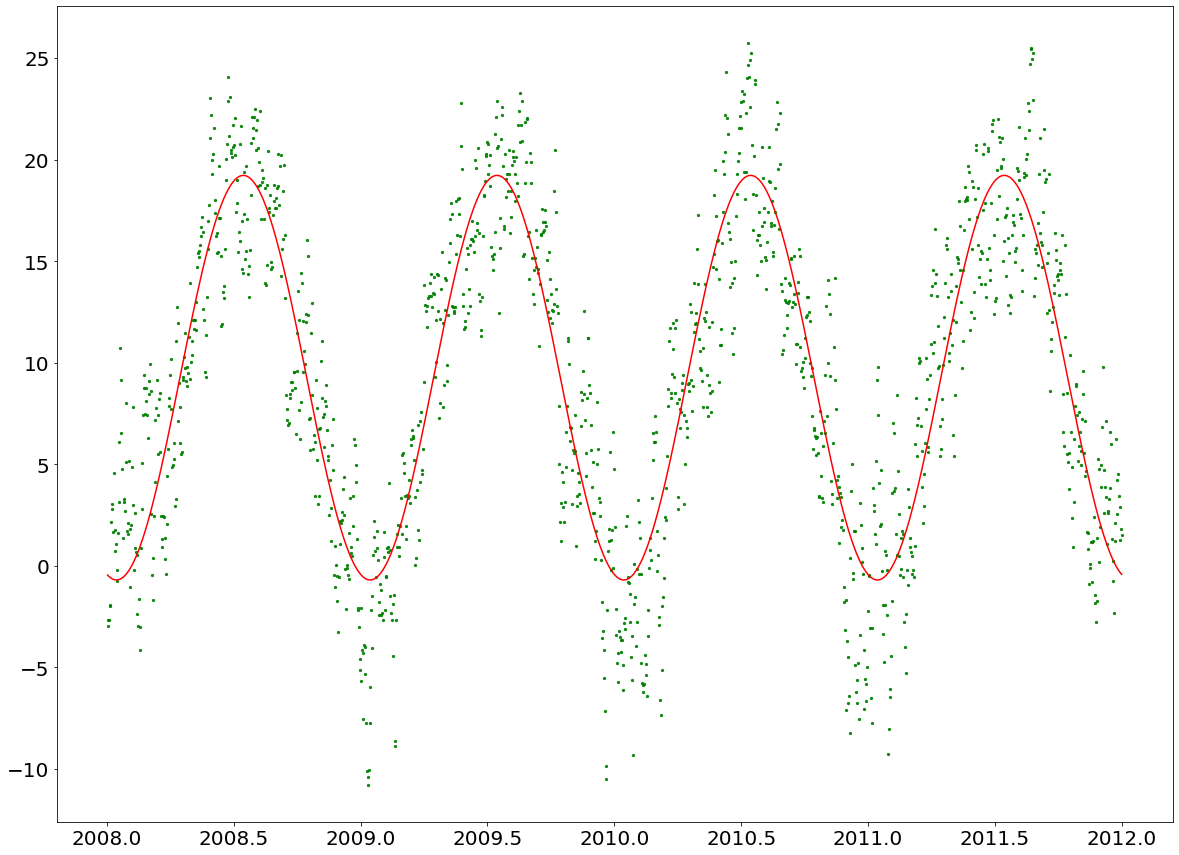

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import math
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1]
#Mask Data
gd1 = (Date > 2008) & (Temp > -98) &\
    (Date < 2012) & (Temp < 98)
good1 = np.where(gd1)[0]

popt, pcov = opt.curve_fit(cosfit, Date[gd1], Temp[gd1], p0 = [1,((math.pi)*2),((math.pi)*2)/3,0])
# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[gd1],Temp[gd1],s=5,c='g',alpha=0.9)
plt.plot(Date[gd1], cosfit(Date[gd1], *popt), c='r')

x = np.mean(Temp[gd1])
print("The mean of all values:", x)
print(*popt)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


Part c) Looking at my model the average temperature in Munich is 9.26 degrees Celcious, the average coldest day would be around ) degrees celcious and finally the average hottest day would be around 20 degrees celcious.

Pard d) The physical meanining for my a value would be the value for the amplitude, b would be the value of translation of the temperature, c would be the shift of values from spring to winter as a cosine fuction and finally d would be the shift from 1995 to 2008. 

0.00010809338798426499 0.276377736019551


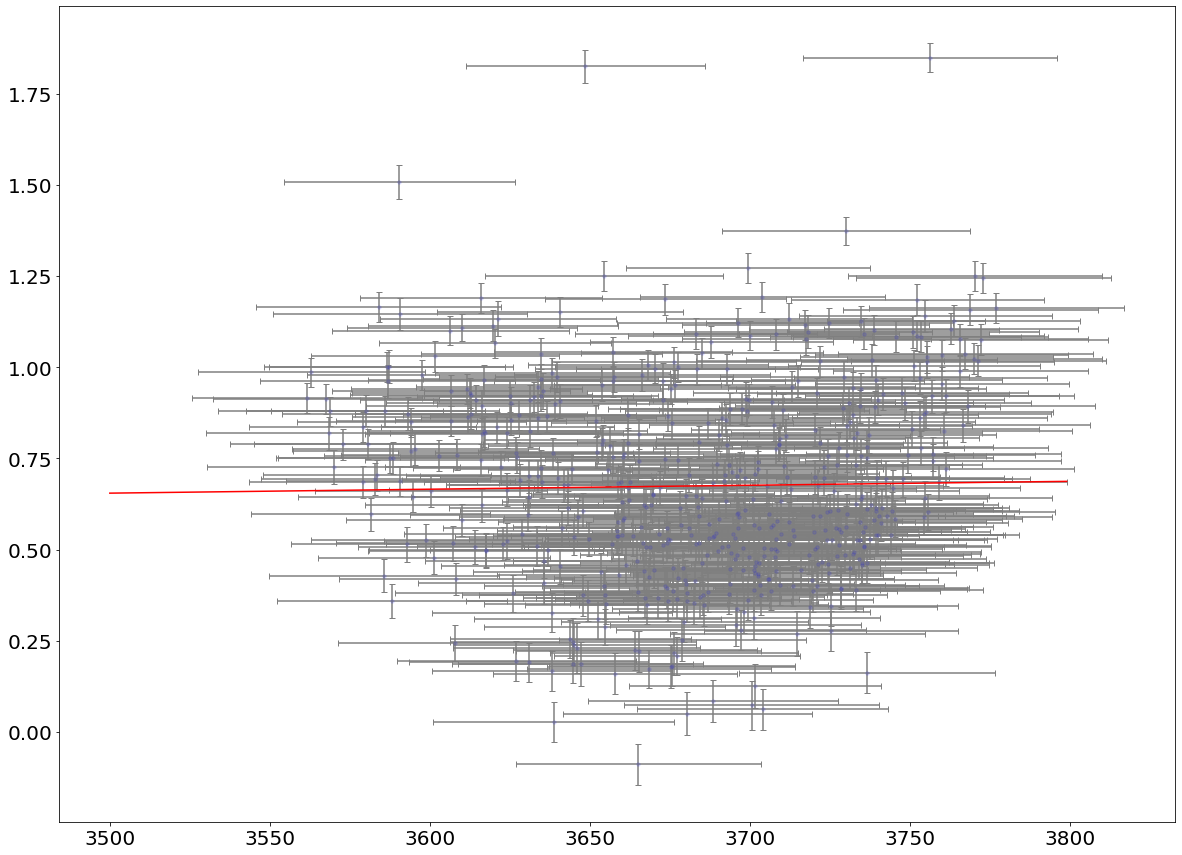

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)
# LINEAR MC FIT
def mcFitLine(x, y, x_err,y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data

star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

     #(star['TEFF'] > -9999) & ((star['TEFF'] < 9999)) &\
     #(star['LOGG'] > -9999) & ((star['LOGG'] < 9999)) &\

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['GLAT'] < 1) & (star['GLAT'] > -1) &\
     (star['TEFF_ERR'] < 40) & (star['TEFF_ERR'] > -40) &\
     (star['LOGG_ERR'] < 40) & (star['LOGG_ERR'] > -40)
good = np.where(gd)[0]
#popt, pcov = opt.curve_fit(linear, star['TEFF'][gd], star['LogG'][gd])
popt,pcov = mcFitLine(star['TEFF'][gd], star['LogG'][gd], star['TEFF_ERR'][gd],star['LOGG_ERR'][gd])
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
xplot = np.arange(3500, 3800, 1)
ax.scatter(star['TEFF'][gd],star['LogG'][gd], s=12,c='b',alpha=0.1)
ax.errorbar(star['TEFF'][gd],star['LogG'][gd],xerr=star['TEFF_ERR'][gd],yerr=star['LOGG_ERR'][gd], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xplot, linear(xplot, *popt), c='r')
print(*popt)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

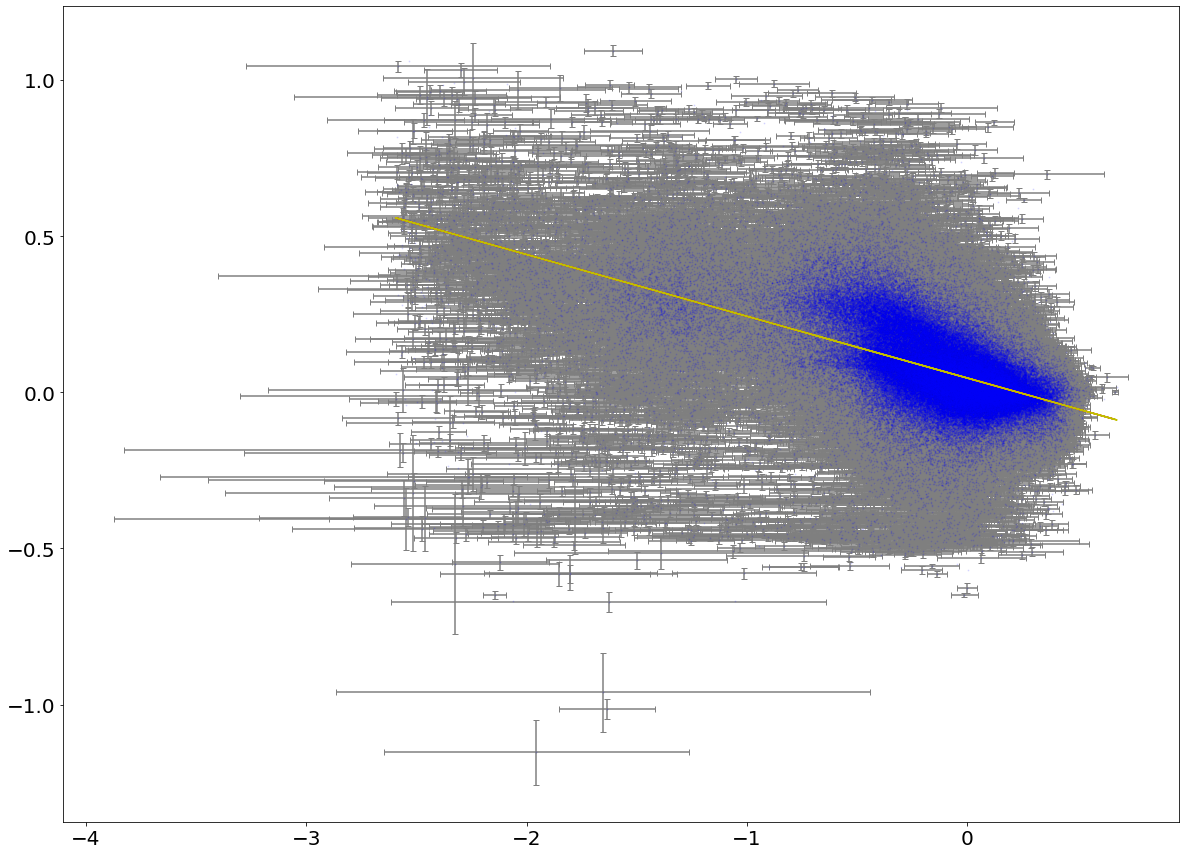

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)
def mcFitLine(x, y, x_err,y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['O_FE'] < 9000) & (star['O_FE'] > -9000) &\
     (star['FE_H'] < 9000) & (star['FE_H'] > -9000) &\
     (star['GLAT'] > 10)
gd1 = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['O_FE'] < 9000) & (star['O_FE'] > -9000) &\
     (star['FE_H'] < 9000) & (star['FE_H'] > -9000) &\
     (star['GLAT'] < -10) 
good = np.where(gd)[0]
good1 = np.where(gd1)[0]
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][gd],star['O_FE'][gd], s=1,c='b',alpha=0.1)
ax.errorbar(star['FE_H'][gd],star['O_FE'][gd],yerr=star['Fe_H_ERR'][gd],xerr=star['O_FE_ERR'][gd], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
popt,pcov = mcFitLine(star['FE_H'][gd], star['O_FE'][gd], star['Fe_H_ERR'][gd],star['O_FE_ERR'][gd])
popt,pcov = mcFitLine(star['FE_H'][gd1], star['O_FE'][gd1], star['Fe_H_ERR'][gd1],star['O_FE_ERR'][gd1])
xplot = np.arange(-4.0,0.0, 0.1)
plt.plot(xplot, linear(xplot, *popt), c='r')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

ValueError: The lengths of the data (26726) and the error 277371 do not match

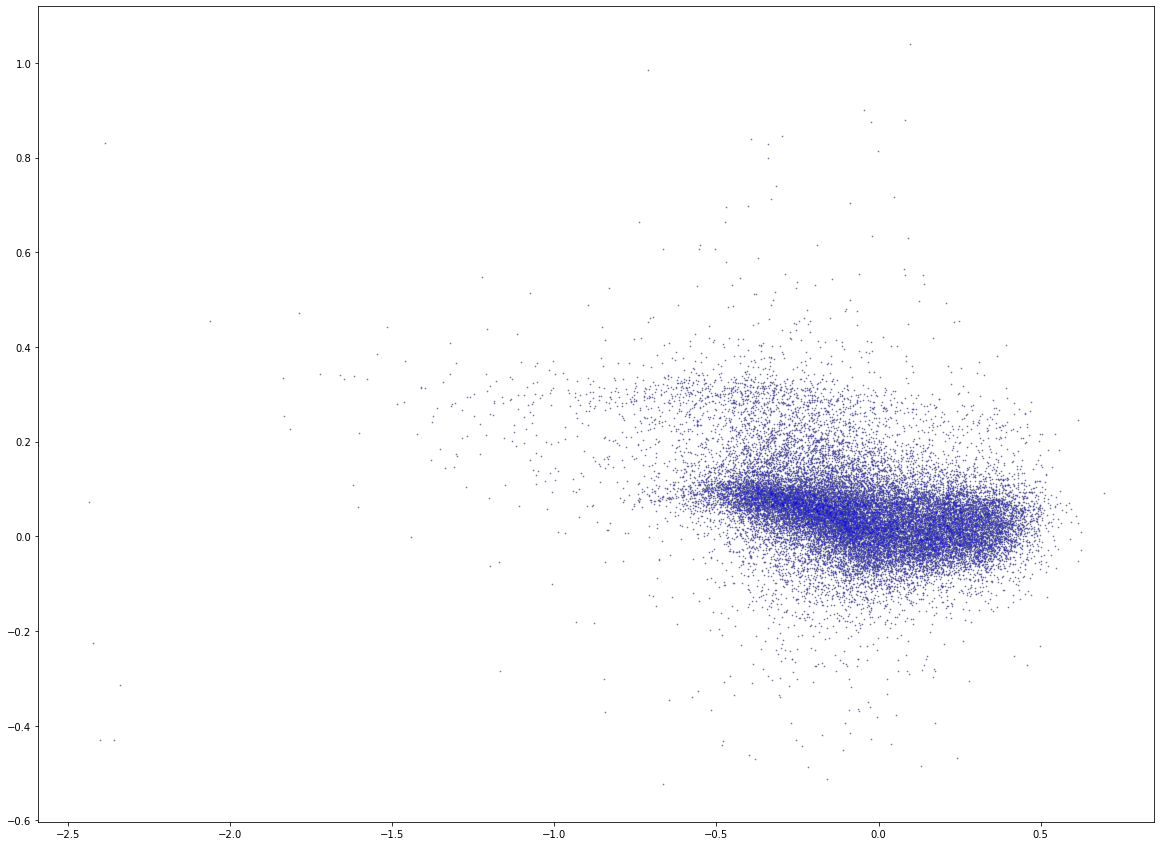

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)
def mcFitLine(x, y, x_err,y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['GLAT'] < 2) & (star['GLAT'] > -2) &\
     (star['O_FE'] < 9000) & (star['O_FE'] > -9000) &\
     (star['FE_H'] < 9000) & (star['FE_H'] > -9000) 

good = np.where(gd)[0]
#popt, pcov = opt.curve_fit(poly3, star['Fe_H'][gd], star['O_FE'][gd])
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
xplot = np.arange(-5.0,5.0,0.1)
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][gd],star['O_FE'][gd],s=1,c='b',alpha=0.1)
ax.errorbar(star['FE_H'][gd],star['O_FE'][gd],xerr=star['Fe_H_ERR'],yerr=star['O_FE_ERR'], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
#To run the McFit
popt,pcov = mcFitLine(star['FE_H'][gd], star['O_FE'][gd], star['Fe_H_ERR'][gd],star['O_FE_ERR'][gd])
xplot=np.arange(-2.5,1.0,0.1)
plt.plot(xplot,linear(xplot,*popt), c ='k')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

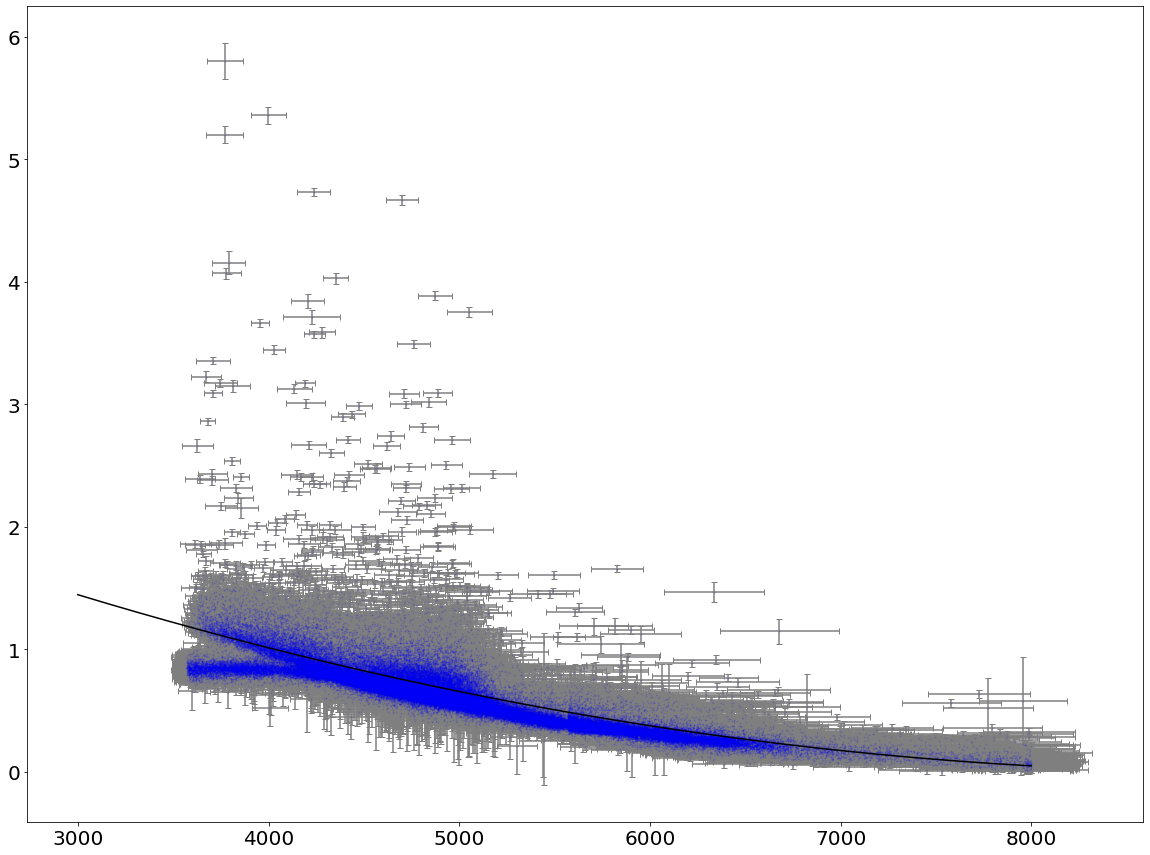

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)
# 3 PARAMETER MC FIT
def mcFit3param(function, xx, yy, xx_err, yy_err):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 200 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y

        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()
star_JK = star['J'] - star['K'] 
ERR_JK = np.sqrt((star['J_ERR']**2)+(star['K_ERR']**2))
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['GLAT'] > 10) &\
     (star_JK > 0) & (star_JK < 2000) &\
     (star['TEFF'] > 3000) & (star['TEFF'] < 8000)&\
    (ERR_JK<5)
gd1 = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['GLAT'] < -10)&\
     (star_JK > 0) & (star_JK < 2000) &\
     (star['TEFF'] > 3000) & (star['TEFF'] < 8000)&\
    (ERR_JK<5)
good = np.where(gd)[0]
good1 = np.where(gd)
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][gd], star_JK[gd],s=1,c='b',alpha=0.1)
ax.scatter(star['TEFF'][gd1],star_JK[gd1], s=1,c='b',alpha=0.1)
ax.errorbar(star['TEFF'][gd],star_JK[gd],xerr=star['TEFF_ERR'][gd],yerr=ERR_JK[gd], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['TEFF'][gd1],star_JK[gd1],xerr=star['TEFF_ERR'][gd1],yerr=ERR_JK[gd1], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
# To run example
popt,pcov = mcFit3param(poly2, star['TEFF'][gd],star_JK[gd],star['TEFF_ERR'][gd],ERR_JK[gd])
popt,pcov = mcFit3param(poly2, star['TEFF'][gd1],star_JK[gd1],star['TEFF_ERR'][gd1],ERR_JK[gd1])
xplot = np.arange(3000,8000,1)
ax.plot(xplot, poly2(xplot, *popt), c='k')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

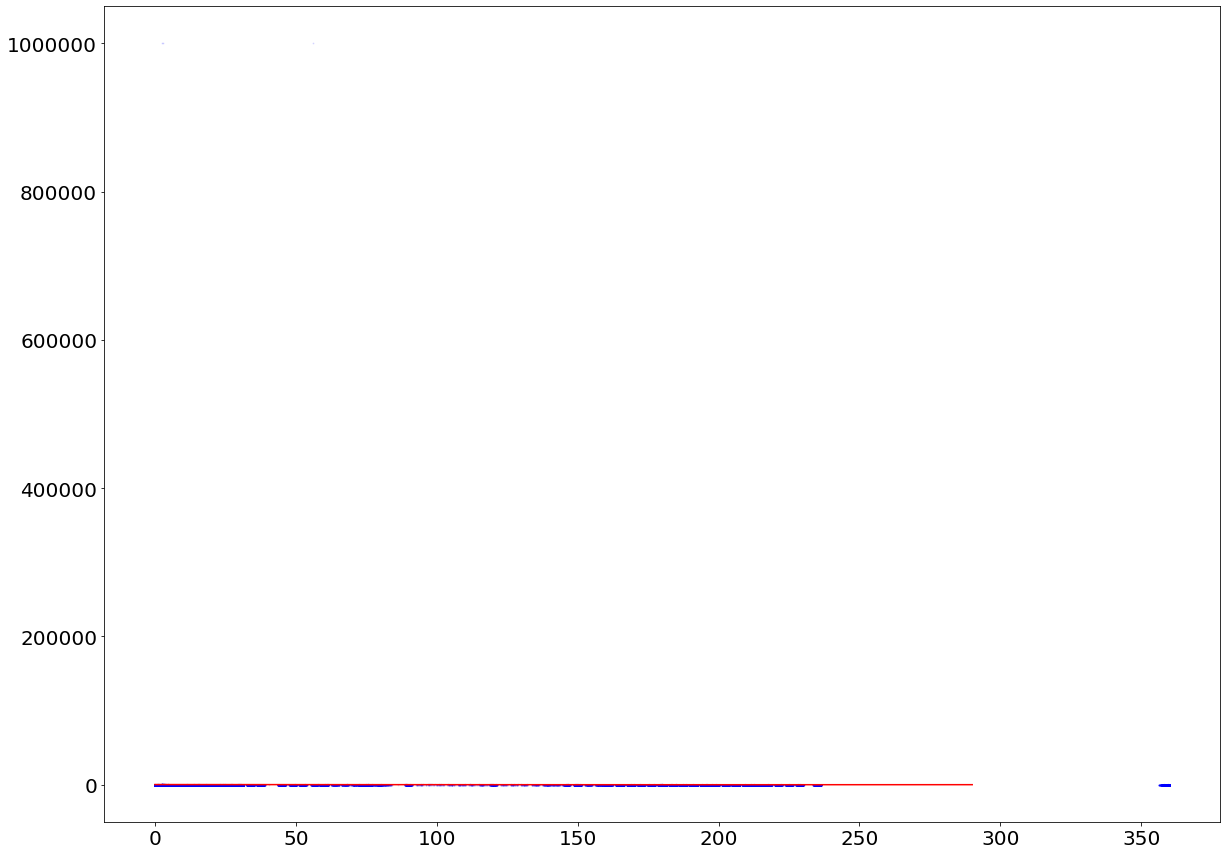

In [69]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(-b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

def mcFit3param(function, xx, yy, xx_err):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]
# To run example
popt,pcov = mcFit3param(poly2, star['GLON'], star['VHELIO_AVG'],star['VERR'])

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['GLAT'] < 10) & (star['GLAT'] > -10) &\
     (star['VHELIO_AVG'] > 0) 
     
good = np.where(gd)[0]
popt, pcov = opt.curve_fit(poly2, star['GLON'][gd], star['VHELIO_AVG'][gd])

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
xplot =np.arange(0,300,10)
ax.scatter(star['GLON'][gd],star['VHELIO_AVG'][gd], s=1,c='b',alpha=0.1)
#ax.errorbar(star['GLON'][gd],star['VHELIO_AVG'][gd],yerr=star['VERR'][gd], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xplot, poly2(xplot, *popt), c='r')
#ax.scatter(star['Fe_H'][gd1],star['O_FE'][gd1], s=1,c='b',alpha=0.1)
#plt.plot(star['Fe_H'][gd1], linear(star['Fe_H'][gd1], *popt), c='y')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

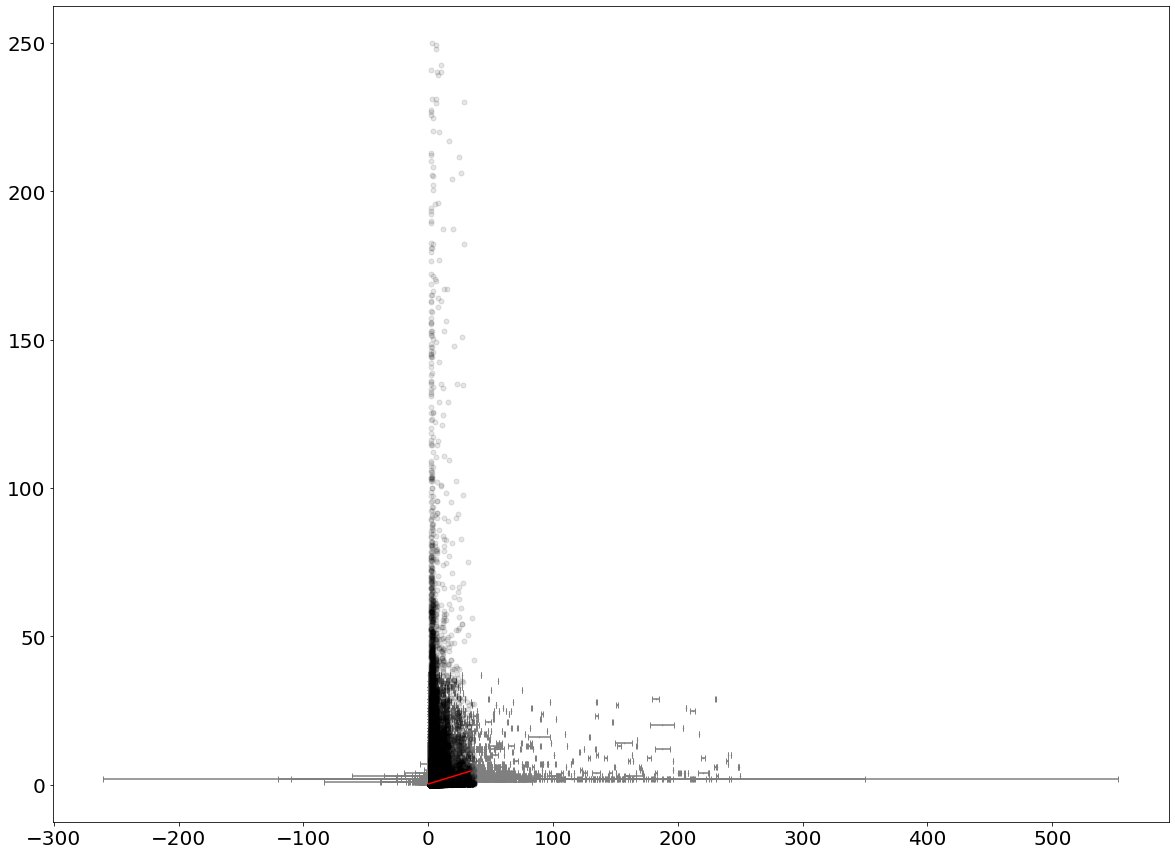

In [64]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(-b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# LINEAR MC FIT
def mcFitLine(x, y, x_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y 

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['VSCATTER'] < 250) &\
     (star['NVISITS'] > 0) &\
     (star['VERR'] < 9000) & (star['VERR'] > 0)
good = np.where(gd)[0]


#popt, pcov = opt.curve_fit(exponential, star['NVISITS'], star['VSCATTER'])
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15)) 
ax = fig.add_subplot(111)
xplot= np.arange(0,35,1)
ax.scatter(star['NVISITS'][gd],star['VSCATTER'][gd], s=25,c='k',alpha=0.1)
ax.errorbar(star['VSCATTER'][gd],star['NVISITS'][gd],xerr=star['VERR'][gd], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
popt,pcov  = mcFitLine(star['NVISITS'][gd], star['VSCATTER'][gd],star['VERR'][gd])
plt.plot(xplot, linear(xplot, *popt), c='r')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

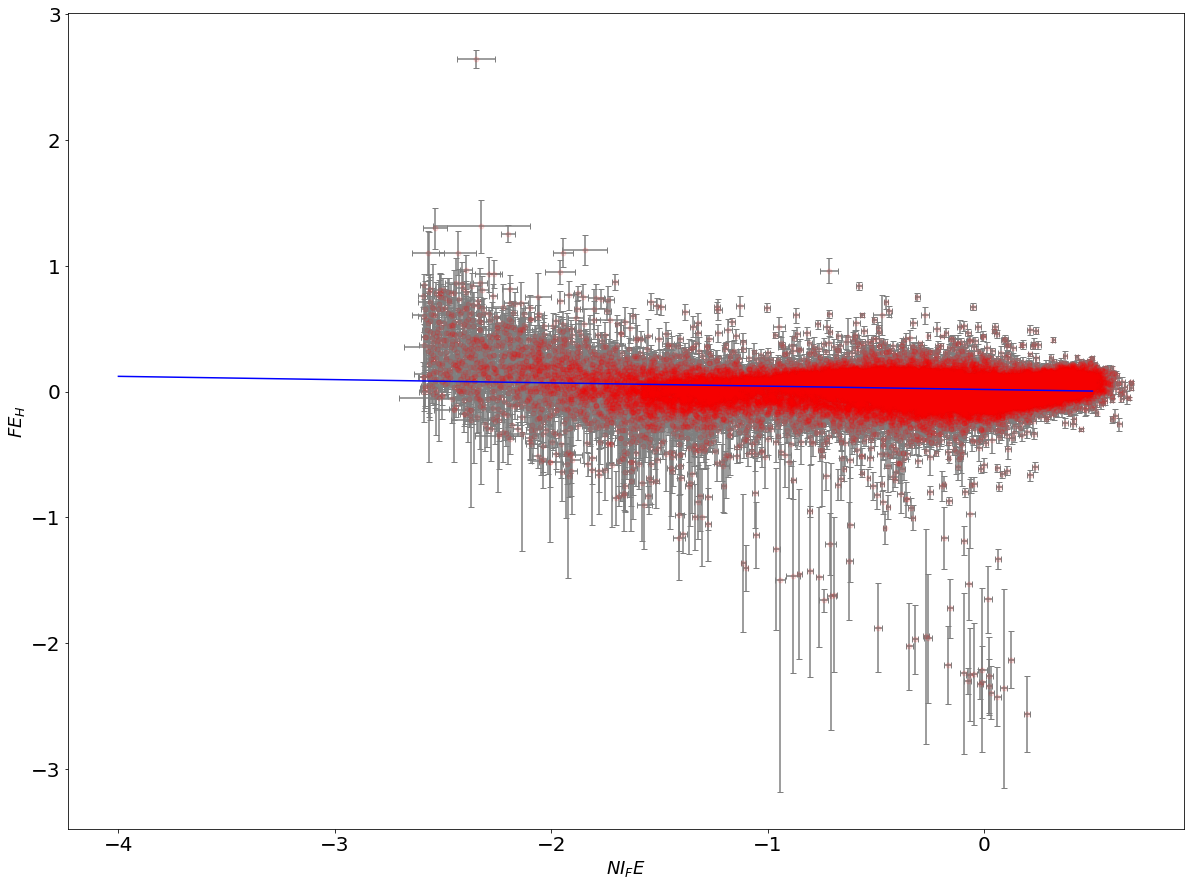

In [51]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(-b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
popt,pcov  = mcFitLine(star['FE_H'][gd], star['NI_FE'][gd],star['Fe_H_ERR'][gd] ,star['NI_FE_ERR'][gd])
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], suspectbits) == 0) &\
     (np.bitwise_and(star['starflag'], badbits) == 0) &\
     (star['FE_H'] < 9000) & (star['FE_H'] > -9000) &\
     (star['NI_FE'] < 9000) & (star['NI_FE'] > -9000) &\
     (star['Fe_H_ERR'] < 9000) & (star['Fe_H_ERR'] > -9000) &\
     (star['NI_FE_ERR'] < 9000) & (star['NI_FE_ERR'] > -9000)
good = np.where(gd)[0]

#popt, pcov = opt.curve_fit(sigmoid, star['NVISITS'], star['VSCATTER'])
popt, pcov = opt.curve_fit(linear, star['Fe_H'][gd], star['NI_Fe'][gd])
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15)) 
ax = fig.add_subplot(111)
ax.set_xlabel('$NI_FE$', fontsize=18)
ax.set_ylabel('$FE_H$', fontsize=18)
ax.errorbar(star['FE_H'][gd],star['NI_FE'][gd],xerr=star['Fe_H_ERR'][gd],yerr=star['NI_FE_ERR'][gd], c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)
xplot = np.arange(-4,1,0.5)
ax.scatter(star['Fe_H'][gd],star['NI_FE'][gd], s=25,c='r',alpha=0.1)
plt.plot(xplot, linear(xplot, *popt), c='b')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()